# CAMBIOS Y MODIFICACIÓN DE FORMATOS CON OPENCV

## Carga de librerías

In [1]:
import cv2 as cv                  # open vision library OpenCV
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representación gráfica

## Carga de imagen de ejemplo

In [2]:
a1 = cv.imread('./img/lena.png')
a2 = cv.cvtColor(a1, cv.COLOR_BGR2RGB)

## Análisis tipología de formato de imagen

In [3]:
print(type(a2))

<class 'numpy.ndarray'>


In [4]:
print(a2.shape)

(512, 512, 3)


La variable a2 es un array numpy. Está formado por 512 filas y 512 columnas. Tiene 3 capas: R, G y B

In [5]:
dt = np.dtype(a2[0,0,0])
print(dt.name)

uint8


Los elementos que componen la matriz son enteros sin signo de 8 bits *(**uint8** - unsigned integer 8 bits)*

Hacemos un display de la imagen con matplotlib

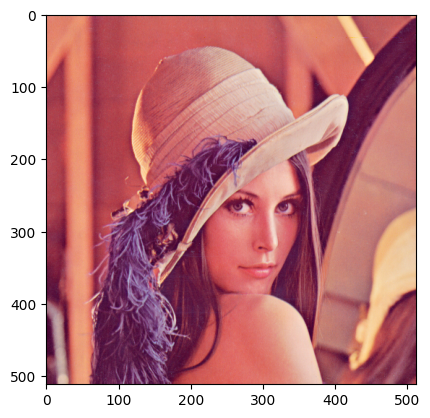

In [6]:
plt.figure()
plt.imshow(a2)
plt.show()

### Cambios de formato 

A escala de grises

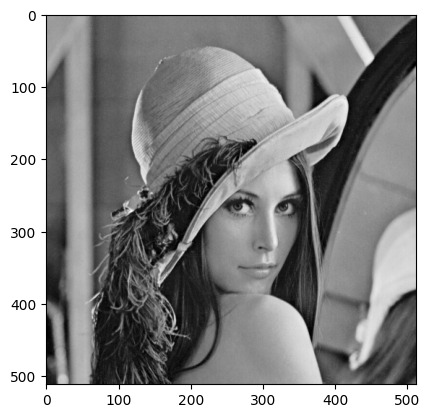

In [8]:
a3 = cv.imread('./img/lena.png', cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(a3, cmap='gray') # para que se vea en escala de grises es necesario cargar el mapa de colores 'gray'
plt.show()

Para guardar la imagen en disco:

In [9]:
image = cv.imwrite('./img/lena_gris.tif',a3)

In [9]:
image = cv.imwrite('./img/lena_gris.jpg',a3)

## Tipos de imágenes y conversiones

Existen tres tipos principales de imágenes:

- La **imagen de intensidad** es una matriz de datos cuyos valores han sido escalados para que representen intensidades de una escala de grises. Los elementos de una imagen de intensidad son de clase **uint8** (enteros almacenados en 8 bits) o de clase **uint16** (enteros almacenados en 16 bits) y pueden almacenar, respectivamente, *2^8^ = 256* valores en el rango [0,255] ó  *2^16^ = 65536* valores en el rango [0,65535]. Cuando la imagen es de clase **float32**, los valores son números en punto flotante (que se almacenan en 32 bits). En este último caso, los valores suelen tomarse en el rango[0,1] o en el rango [0,255], indistintamente.   

- La **imagen binaria** es una imagen en blanco y negro. Cada pixel tiene asignado un valor lógico de 0 ó 1.
- La **imagen en color** es como la imagen de intensidad pero tiene tres canales, es decir, a cada pixel le corresponden tres valores de intensidad (RGB) en lugar de uno.   

Cuando realizamos transformaciones matemáticas de imágenes, normalmente necesitamos que la imagen sea de tipo `float`. Pero cuando la leemos y almacenamos ahorramos espacio usando codificación entera sin signo.    

Para ello, podemos usar las órdenes siguientes:

In [10]:
a4 = a3.astype(np.float32) 

La expresión anterior nos convierte una matriz de tipo **uint8** a **float32**

In [11]:
a5 = a4.astype(np.uint8)
image = cv.imwrite('./img/lena_gris.tif', a5)

En este otro tramo de código primero se convierte la matriz a4 de **float32** a **uint8** y luego se guarda en el disco.

A continuación, se va a realizar un conjunto de transformaciones usando la imagen en formato **float32**

1. Seleccionaremos parte de la imagen, restringiendo los índices de esta
2. Generaremos un plot
3. Guardaremos el resultado

In [12]:
# SELECCIONAR PARTE DE LA IMAGEN
a = np.copy(a4)
ojo_Lena = a[251:283, 317:349]

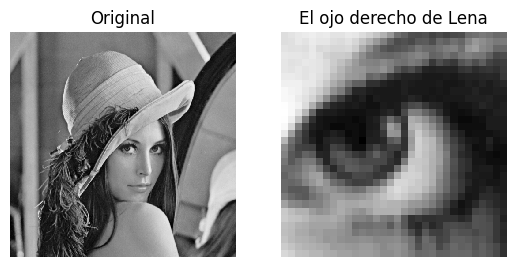

In [13]:
# GENERACIÓN DEL PLOT
plt.figure()

plt.subplot(121)
plt.imshow(a, cmap='gray', interpolation='nearest')
plt.title('Original'), plt.axis('off') 

plt.subplot(122)
plt.imshow(ojo_Lena, cmap='gray', interpolation='nearest') 
plt.title('El ojo derecho de Lena'), plt.axis('off') 

plt.show()

In [14]:
# GUARDADO DE IMAGEN
ojo_Lena = ojo_Lena.astype(np.uint8)
image = cv.imwrite('./img/OjoLena.jpg', ojo_Lena)

## EJERCICIOS

**Ejercicio 1**
Codificar una función que disponga de:
- una *ENTRADA* con una imagen de cualquier tipo y el rango para los píxeles **(x,y)** a extraer.  
- una *SALIDA* en formato de matriz de datos de tipo **float32** correspondiente a los índices indicados en la imagen original y una figura de la misma.

Se debe aplicar la función para extraer la cabeza del cameraman de la imagen *cameraman.tif* que está en la carpeta 'img'

**Ejercicio 2**
Las máscaras son filtros geométricos de una imagen. Por ejemplo, si queremos seleccionar una región de una imagen, podemos hacerlo multiplicando la matriz de la imagen original por una matriz de igual tamaño que contenga unos en la región que queremos conservar y ceros en el resto. En este ejercicio seleccionaremos una región circular de la imagen lena_gray_512.tif de radio 150. Seguir los pasos siguientes:

- Leer la imagen y convertirla a float.
- Crear una matriz de la misma dimensión rellena de ceros.
- Modificar esta matriz de forma que contenga unos en un círculo de radio 150, es decir, si $(i - c_{y})^2 + (j - c_{x})^2 < 150^2$ , con $(c_{x}, c_{y})$ como centro (píxel arriba, píxel abajo) de la imagen.
- Multiplicar la imagen por la máscara.
- Mostrar el resultado.

Cuando se multiplica por cero, se convierten a negro los píxeles de fuera del círculo. Modifica el programa para hacer visible esos píxeles con la mitad de su intensidad.

**Ejercicio 3**

El degradado lineal es un efecto en el que se oscurece una imagen desde una parte de la misma hasta la parte opuesta alterando la intensidad original de un modo proporcional. Por ejemplo, en la degradación vertical, podemos implementar este filtro mediante una máscara que sea constante por columnas pero tome un valor decreciente por filas, desde 1 en la primera fila a cero en la última.

Construir dicha matriz y crear el degradado de la imagen de Lena. Visualizar la imagen original y la filtrada.

*Nota*: un modo de resolverlo es usando bucles y condicionales. Pero vectorizar ahorra tiempo de ejecución: con el comando **numpy.linspace** puede definirse la degradación, y mediante numpy.tile puede construirse, repitiendo el vector obtenido con **numpy.linspace**, la matriz máscara.

**Ejercicio 4**

Construir, como array numpy, la imagen de un tablero de ajedrez, donde cada casilla tiene un tamaño de $250×250$ pixels. Mostrar el resultado. Se puede usar la orden *numpy.tile*.

Numpy tile: https://runebook.dev/es/docs/numpy/reference/generated/numpy.tile

**Ejercicio 5**

Construir, como array numpy, una imagen de círculos concéntricos. La imagen tiene un tamaño de $500×500$ pixels. Cada circunferencia tiene una anchura aproximada de 4 ó 5 pixels. Mostrar el resultado.

<img src="./img/concentrico.jpg">